# Decision Tree Exploration
with Pandas & Scikitlearn

This learning activity will focus on regression using the DecisionTreeRegressor (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)  

The student coding activity will allow you to explore 2 of the many hypeparameters available with this model.

For an example with Classification Trees on the Iris dataset, see http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html


In [2]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from mpl_toolkits.mplot3d import Axes3D

### Build a 2D dataset (X1, X2) and the associated y values

The dataset contains 5 regions, each with its own unique y value.   Noise is added to the y value to create interesting data for a regression model to learn through.

In [3]:
#build data
def makedata(myseed=1,obsCount = 1000):
    np.random.seed(myseed)
    xmin = 0
    xmax = 5
    #select features to sample at
    
    X = np.random.uniform(xmin,xmax,size = (obsCount,2))
    #set up y by regions
    y = np.zeros((obsCount,1))
    R1 = np.logical_and(X[:,0]<=2 , X[:,1]<=2)
    R2 = np.logical_and(X[:,0]<=2 , X[:,1]>2)
    R3 = np.logical_and(X[:,0]<=3 , X[:,0]>2)
    R4 = np.logical_and(X[:,0]>3 , X[:,1]<=3.5)
    R5 = np.logical_and(X[:,0]>3 , X[:,1]>3.5)
    #set up y values for each region
    y[R1,0] = 5
    y[R2,0] = 0
    y[R3,0] = 15
    y[R4,0] = 20
    y[R5,0] = 25
    #add noise to data
    noise = np.random.normal(0,0.75,(obsCount,1))
    y = y + noise
    d = np.hstack((X,y))
    df = pd.DataFrame(data = d, columns = ['X1','X2','y'],dtype=float)
    return(df)

### Generate data and split into test & non-test datasets
After this cell we will use the non-test data for decisionmaking and use the test data for model evaluation

Note that you can use validation methods on the non-test data (e.g. val set, k-fold crossval) to make modeling decisions

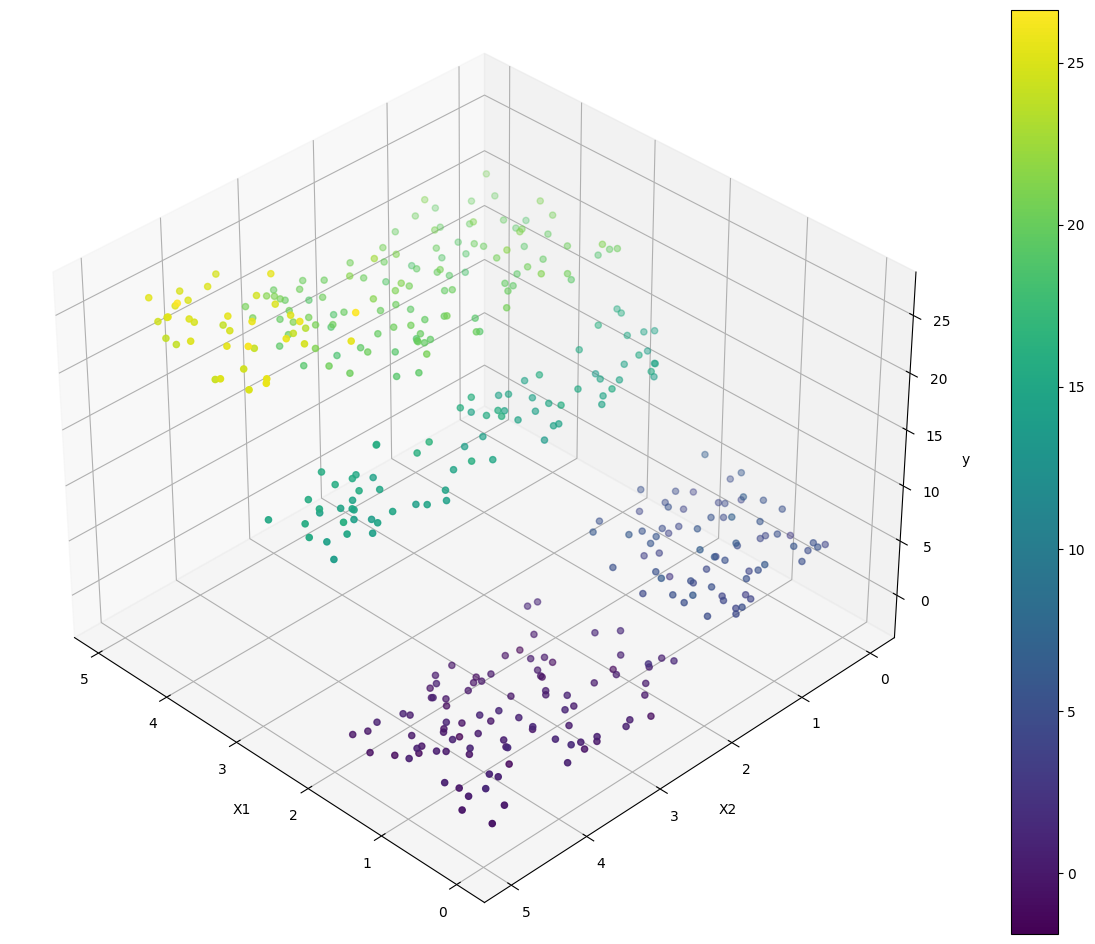

In [4]:
df = makedata(1,obsCount=800)

#split data into train and test
df_nonTest, df_test = train_test_split(df, test_size=0.5)


#show the original data
fig = plt.figure(figsize = (20,12))
threedee = fig.add_subplot(111, projection='3d')

threedee.scatter(df_nonTest.X1, df_nonTest.X2, df_nonTest.y, c=df_nonTest.y)
# m = cm.ScalarMappable(cmap=cm.jet)
m = cm.ScalarMappable()
m.set_array(df_nonTest.y)

ax=plt.gca()
plt.colorbar(m,ax=ax)

threedee.set_xlabel('X1')
threedee.set_ylabel('X2')
threedee.set_zlabel('y')

# ax.view_init(-90, 0)
# plt.show()
ax.view_init(35, 135)
plt.show()



# Demonstrating the process for tree fitting

### Set up the data for fitting a model on the full non-test set

In [5]:
features = ['X1', 'X2']
target = ['y']
y = df_nonTest[target]
X = df_nonTest[features]


### Function to fit a model with specific hyperparameters

`fit_my_tree` should be called with X and y values as well as a max depth and a minimum samples per leaf node
* the max depth is the max depth of a leaf node (Default of None means unlimited)
* the minimum samples per leaf node will prevent more splits if the leaf is too small (default value = 1)

In [6]:
def fit_my_tree(my_X, my_y, my_maxDepth = None, my_minSamplesLeaf=1):
    #instantiate the model with the hyperparamters
    dt = DecisionTreeRegressor(min_samples_leaf=my_minSamplesLeaf, max_depth=my_maxDepth, random_state=99)
    dt.fit(my_X, my_y)
    return dt

### Demonstration: Fit a small tree & display the tree's decision splits graphically

Using sklearn's ```plot_tree``` function we can graphically depict the decision tree graph structure and important information such as where the splits occur and how good the mean squared error is for each node in the tree IF the tree had no further splits at that point.   Notice the the MSE improves near the leaf nodes, but isnt that great in th root node (if no further splits had occured). 

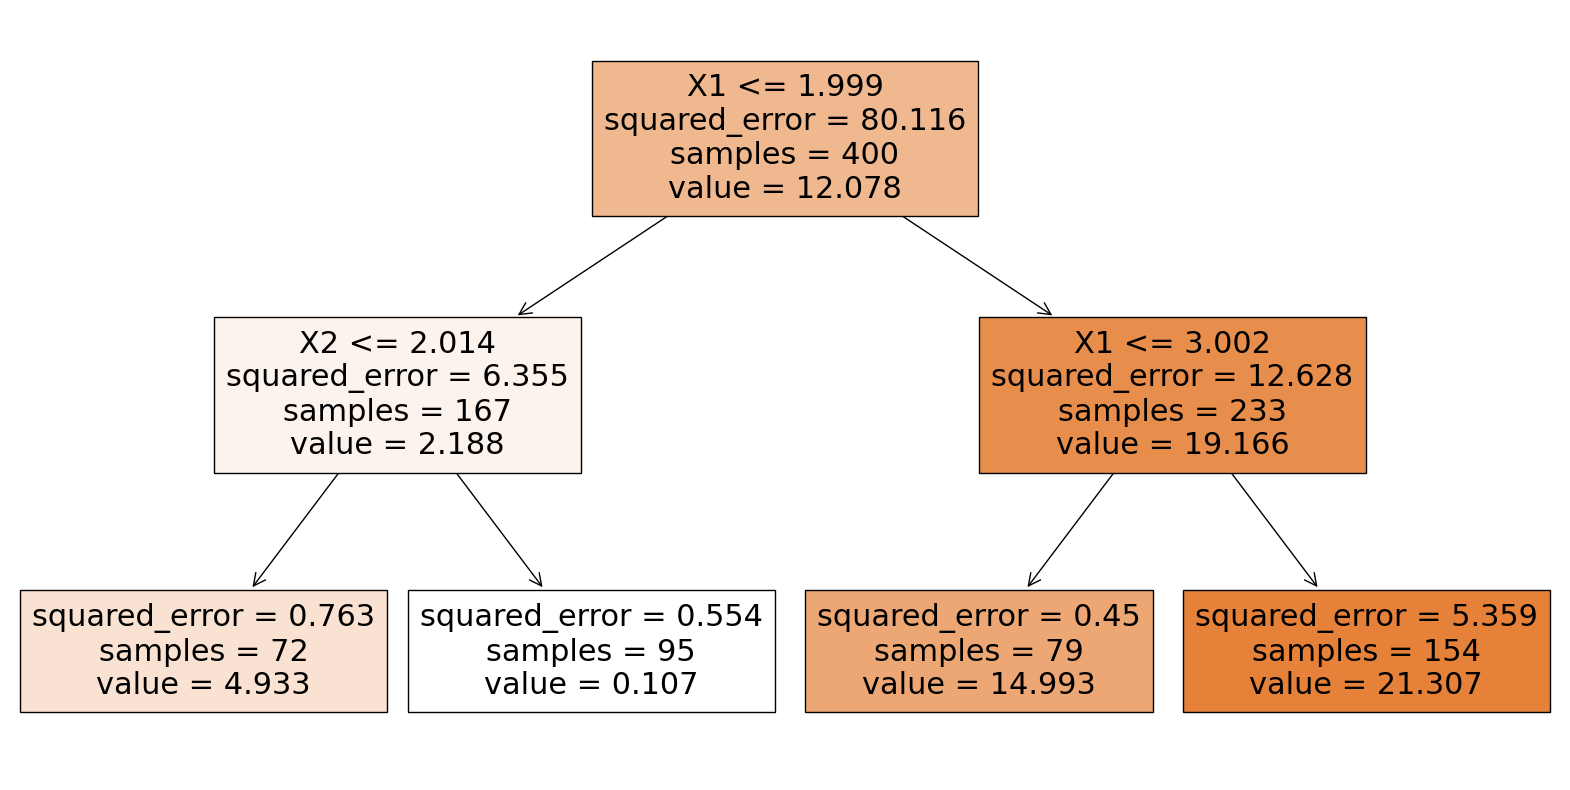

In [7]:
ddt = fit_my_tree(X,y, my_maxDepth=2)
plt.figure(figsize = (20,10))
fig = tree.plot_tree(ddt,feature_names=features,filled=True,proportion=False)


### display the tree regions using colorized points of a grid

In [8]:
def displayRegressionTreeMesh(regressorModel=None, gridcount=20):
    """ Helper function to display decision Tree outputs (y) using meshgrid for 2d data
    
    Args
    ----
    regressorModel -- a decision tree regressor model
    gridcount -- the number of points per dimension to display
    
    Note:  this will attempt to display gridcount^2 total points on the scatterplot
    """
    #generate a mesh of points to display
    x_span = np.linspace(0,5,gridcount)
    x1grid,x2grid = np.meshgrid(x_span,x_span)
    xval_array = np.array([x1grid.ravel(),x2grid.ravel()]).T
    xvals = pd.DataFrame(data = xval_array, columns=features,dtype=float)
    
    #use the regression tree model to predict values
    yvals = regressorModel.predict(xvals)
    #print(ygrid.shape)
    ygrid_mesh = yvals.reshape(x1grid.shape)
    #print(ygrid_mesh.shape)
    
    #display the points
    # threedee = plt.figure(figsize = (16,9)).gca(projection='3d')
    fig = plt.figure(figsize = (20,12))
    threedee = fig.add_subplot(111, projection='3d')

    
    #     threedee.scatter(x1grid, x2grid, yvals, c=ygrid,alpha=0.8)
    threedee.plot_surface(x1grid, x2grid, ygrid_mesh,cmap=cm.coolwarm, alpha=0.8)
    m = cm.ScalarMappable(cmap=cm.jet)
    m.set_array(ygrid_mesh)

    ax=plt.gca()
    ax.view_init(35, 135)
    plt.colorbar(m,ax=ax)

    # ax.view_init(15, -45)
    threedee.set_xlabel('X1')
    threedee.set_ylabel('X2')
    threedee.set_zlabel('y')
    plt.show()


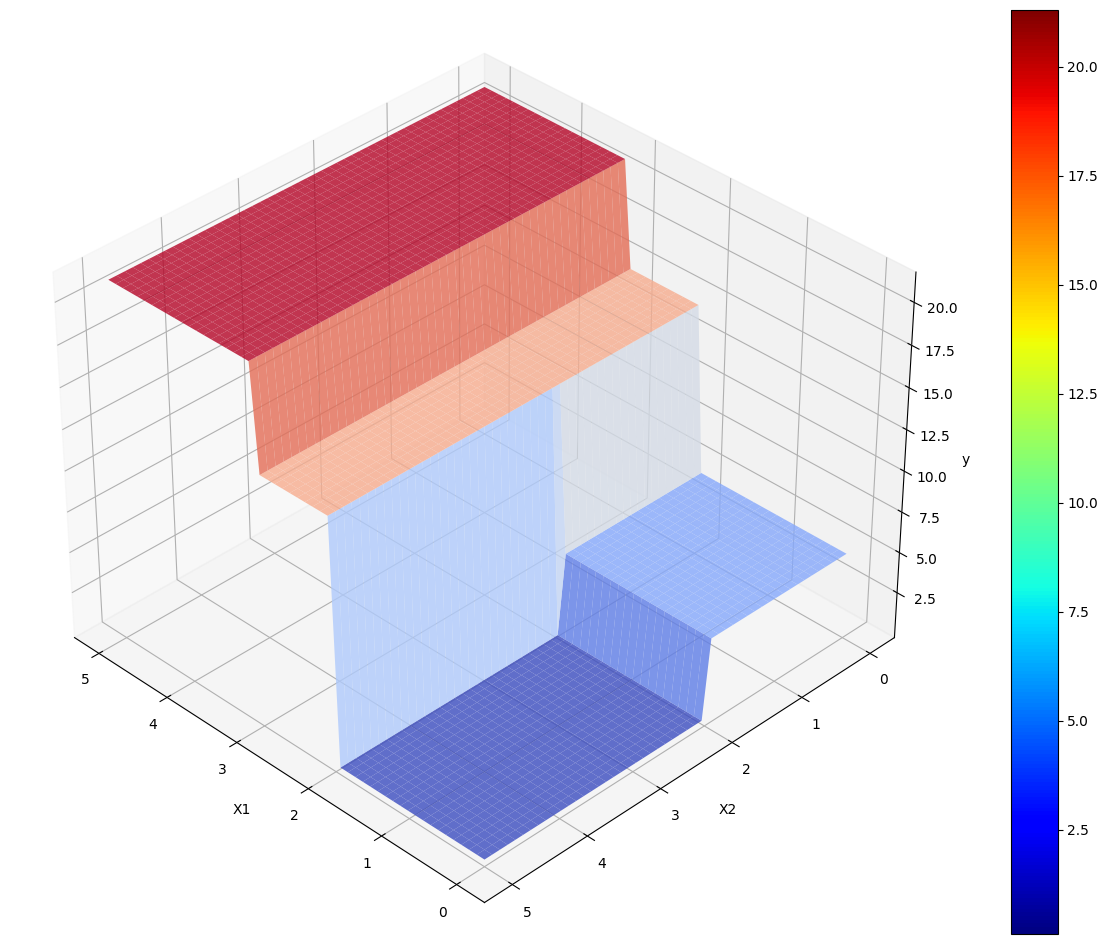

In [9]:
displayRegressionTreeMesh(regressorModel=ddt, gridcount=50)

Notice how the Mesh has 4 distinct regions, even though the original data was created with 5 distinct regions. 

### Display the MSE on the test set for this demonstration model

In [10]:
def displayRMSE(regressorModel=None, df=None, features = ['X1', 'X2'], target = ['y']  ):
    """Helper function to display MSE of precitions on a datagrame using regressorModel 
    
    Args
    ---
    regressorModel - a regression model to be used for computing predictions
    df - a dataframe containing target and features
    features - a list of feature column names in the dataframe
    target - a target column name in the dataframe
    """
    
    y = df[target]
    X = df[features]
    
    #make predictions on the model
    yhat = regressorModel.predict(X)

    rmse = np.sqrt(mean_squared_error(y,yhat))
    return rmse

In [11]:
print("RMSE of demo model: ", displayRMSE(ddt, df_test))

RMSE of demo model:  1.6593140897215695


# Searching for good tree parameters

## OVERVIEW: 
using the non_Test data, employ a validation method (e.g. valset; crossvalidation) to select from a set of max depths and minimum leaf node sizes to find a tree with good expected performance.   Store this fitted model in ```bestValTreeRegressor``` 

We will use automated CV grid search with ```GridSearchCV```
for similar activities, see
* https://scikit-learn.org/stable/modules/grid_search.html#grid-search
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

Note that using the instructor-provided helper functions to fit tree models is not necessary, especially if using ```GridSearchCV``` since there may be more efficient ways to search


In [12]:
#provided by instructor

# def myGridSearch(tuned_parameters=None,df_nonTest=None,df_test=None,features = ['X1', 'X2'], target = ['y']):
def myGridSearch(tuned_parameters=None,df_nonTest=None,features = ['X1', 'X2'], target = ['y']):

    y_train = df_nonTest[target]
    X_train = df_nonTest[features]
    # y_test = df_test[target]
    # X_test = df_test[features]

    base_estimator = DecisionTreeRegressor(random_state=0)


    scores = ['neg_mean_squared_error']
    #for other scorers, see https://scikit-learn.org/stable/modules/model_evaluation.html 


    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            base_estimator, tuned_parameters, scoring=score
        )
        clf.fit(X_train, y_train)

        print("Best parameters set found during crossval:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = -clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        # for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        #     print("Mean: %0.3f, StdDev: (+/-%0.03f) for Params %r"
        #           % (mean, std * 2, params))
        for params, mean, std in zip(clf.cv_results_['params'],means, stds ):
            print("Params %r: RMSE %0.3f, StdDev (+/-%0.03f)"
                  % (params, np.sqrt(mean), std * 2))

    return clf.best_params_
        
        

## STEP 1:  (STUDENT CODING REQUIRED)

Select a set of values of the hyperparameters to search over.  
```min_samples_leaf```
```max_depth```

For this demonstration we are selecting search values from the minimum samples per leaf (which helps prevent overfitting) and the max tree depth (which indicates the maximum number of subsplits can be created: effectively the maximum depth of the lowest leaf node).  Note that these two hyperparameters are not independent... choosing a smaller number for depth means there will be more samples per leaf, thus less likely to be stopped from further splits due to the the number of samples per leaf.

for example, if you wanted to search only the value 5 for min samples per leaf and both 1 and 2 for max depth you would code this line

```my_hyperparameters = [{'min_samples_leaf': [5], 'max_depth': [1,2]}] ```


In [21]:
my_hyperparameters = [{'min_samples_leaf': [5], 'max_depth': [1,2]}]  #placeholder.... you need to fill in these with values

#----------- STUDENT CODE HERE -------------

#put additional values in each list, separated by commas
my_hyperparameters = [{'min_samples_leaf': [20], 'max_depth': [None]},
                      {'min_samples_leaf': [10], 'max_depth': [None]},
                      {'min_samples_leaf': [2], 'max_depth': [20]},
                      {'min_samples_leaf': [26], 'max_depth': [None]}]


#----------- END STUDENT CODE --------------

best_parameters = myGridSearch(tuned_parameters=my_hyperparameters,
                               df_nonTest=df_nonTest,
                               # df_test=df_test,
                               features = ['X1', 'X2'], target = ['y'])
print("\nBEST PARAMETERS:", best_parameters)

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found during crossval:

{'max_depth': None, 'min_samples_leaf': 26}

Grid scores on development set:

Params {'max_depth': None, 'min_samples_leaf': 20}: RMSE 1.460, StdDev (+/-2.576)
Params {'max_depth': None, 'min_samples_leaf': 10}: RMSE 1.478, StdDev (+/-2.380)
Params {'max_depth': 20, 'min_samples_leaf': 2}: RMSE 1.566, StdDev (+/-2.389)
Params {'max_depth': None, 'min_samples_leaf': 26}: RMSE 1.390, StdDev (+/-2.169)

BEST PARAMETERS: {'max_depth': None, 'min_samples_leaf': 26}


## STEP 2:  (STUDENT CODING REQUIRED)

using the ```best_parameters``` from step 1, display the decision tree, the scatterplot and the MSE for the best tree.
Note that if you resulting tree has many regions (leaf nodes) the grid scatterplot may be difficult to view

best max_depth: None ; best min_samples_leaf:  20


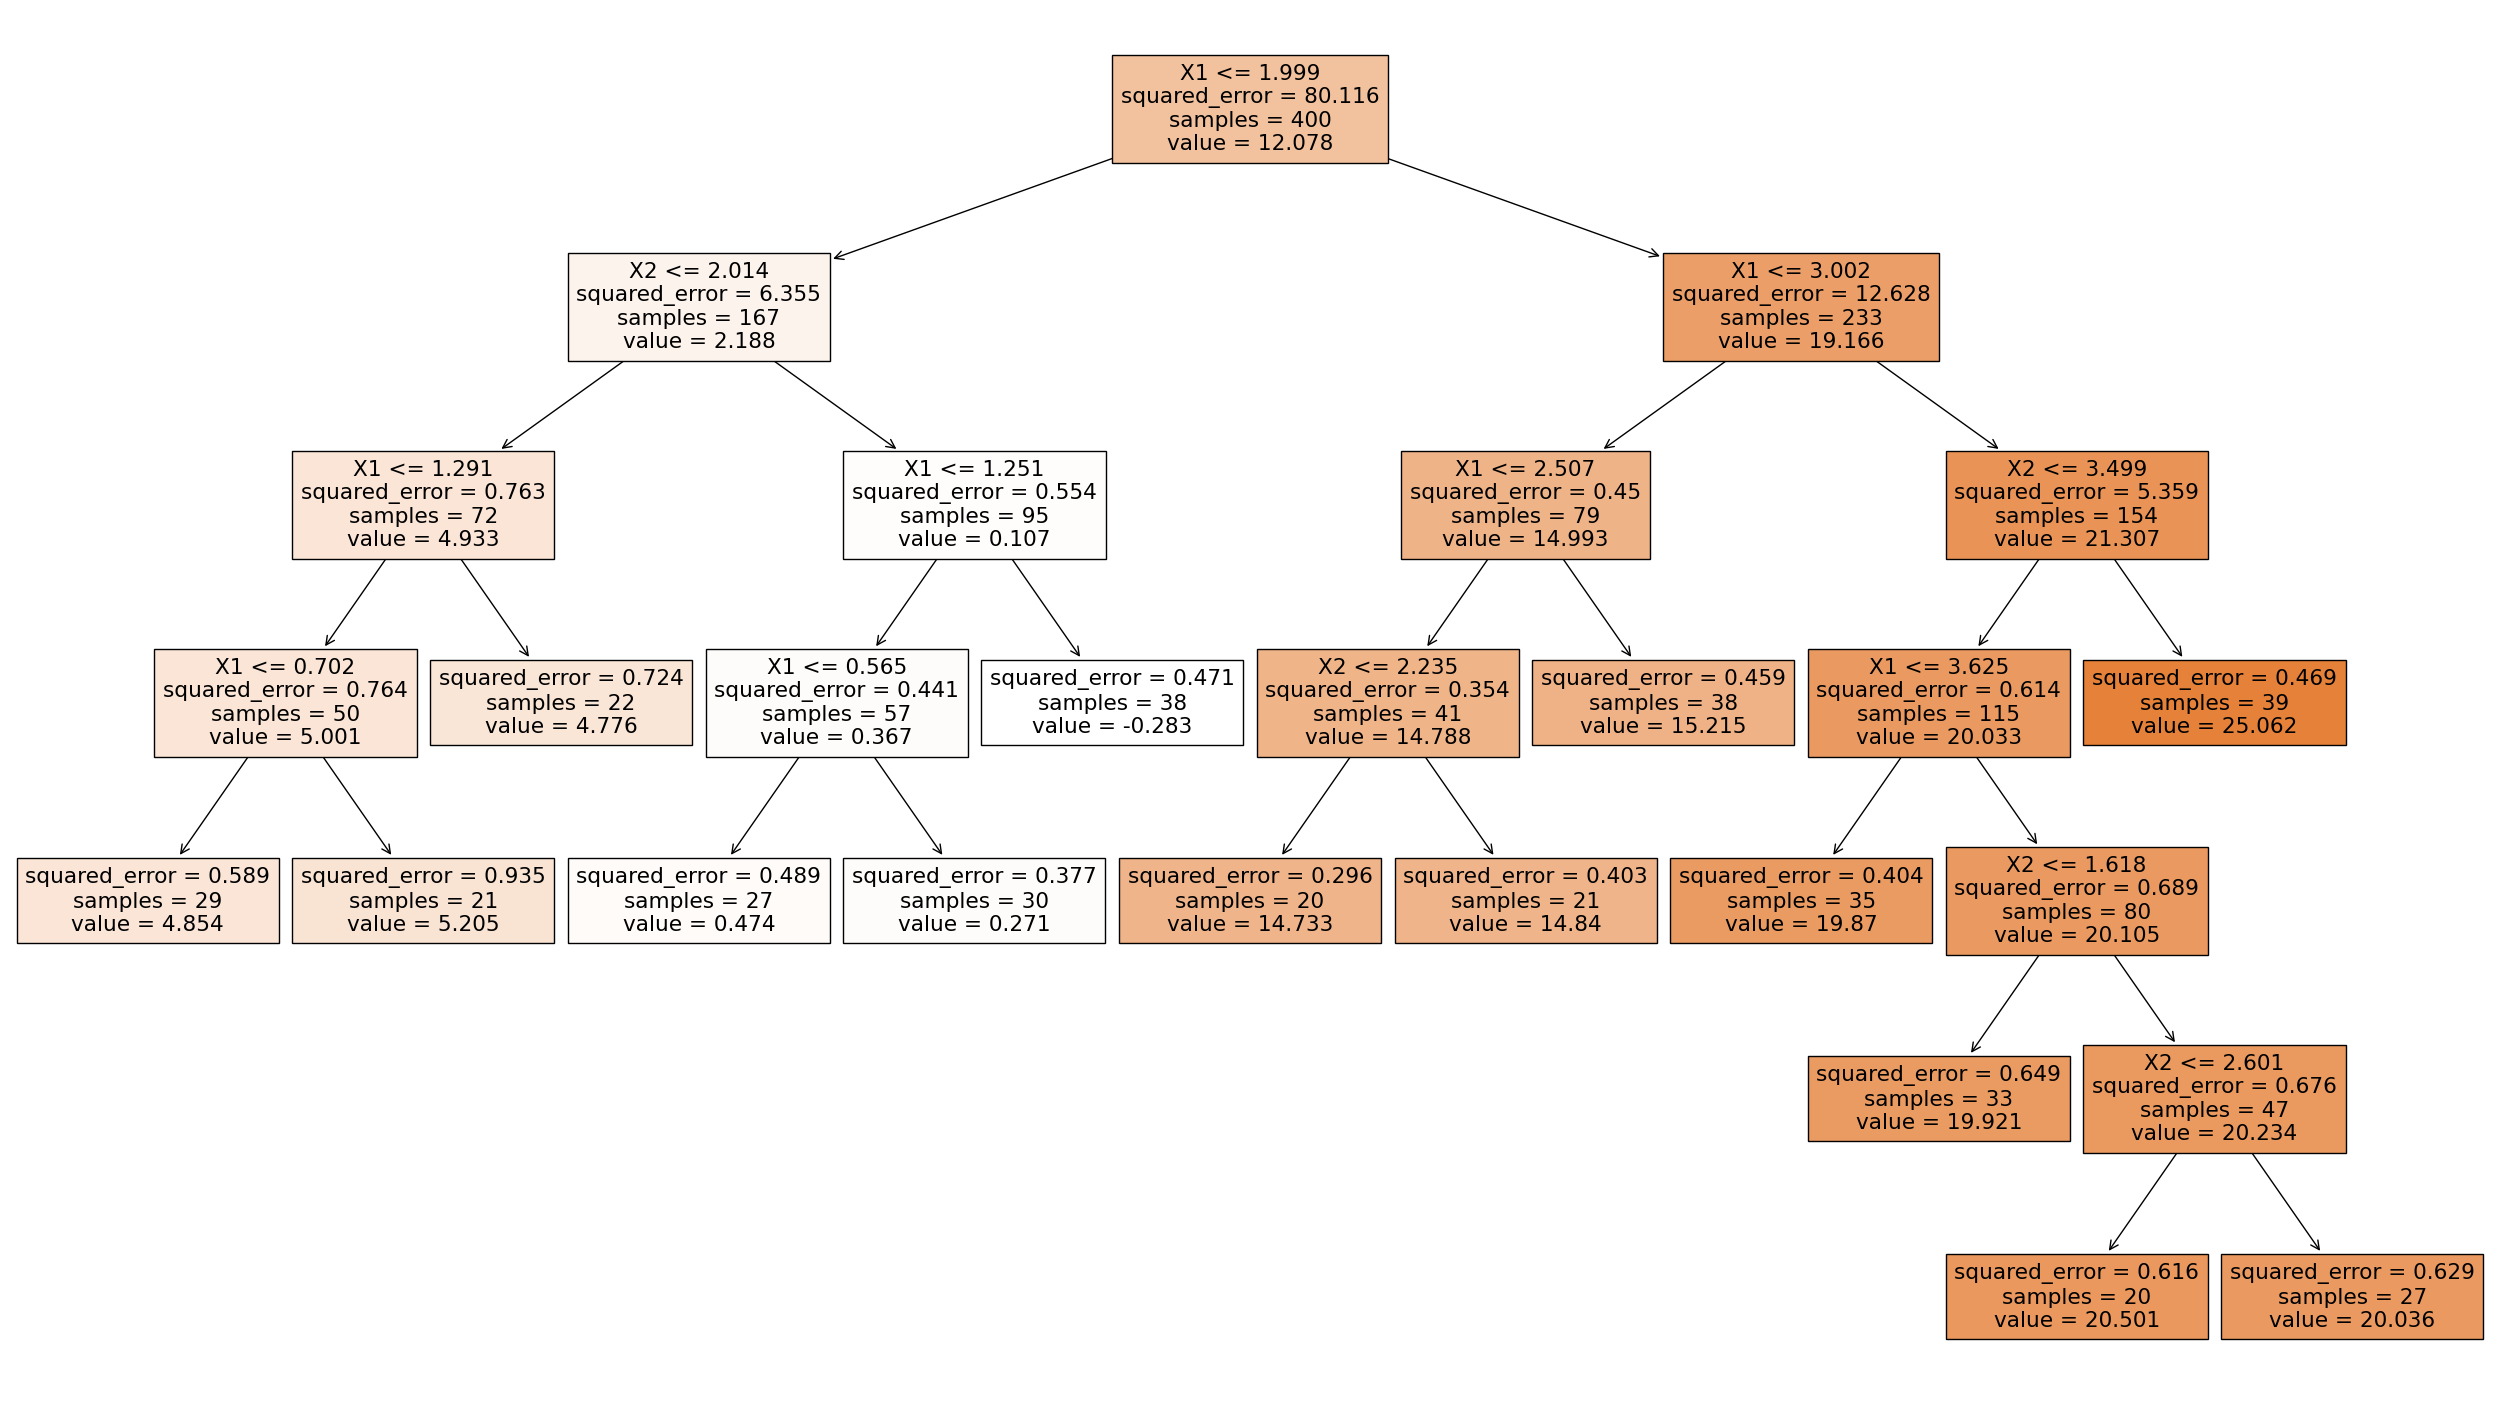

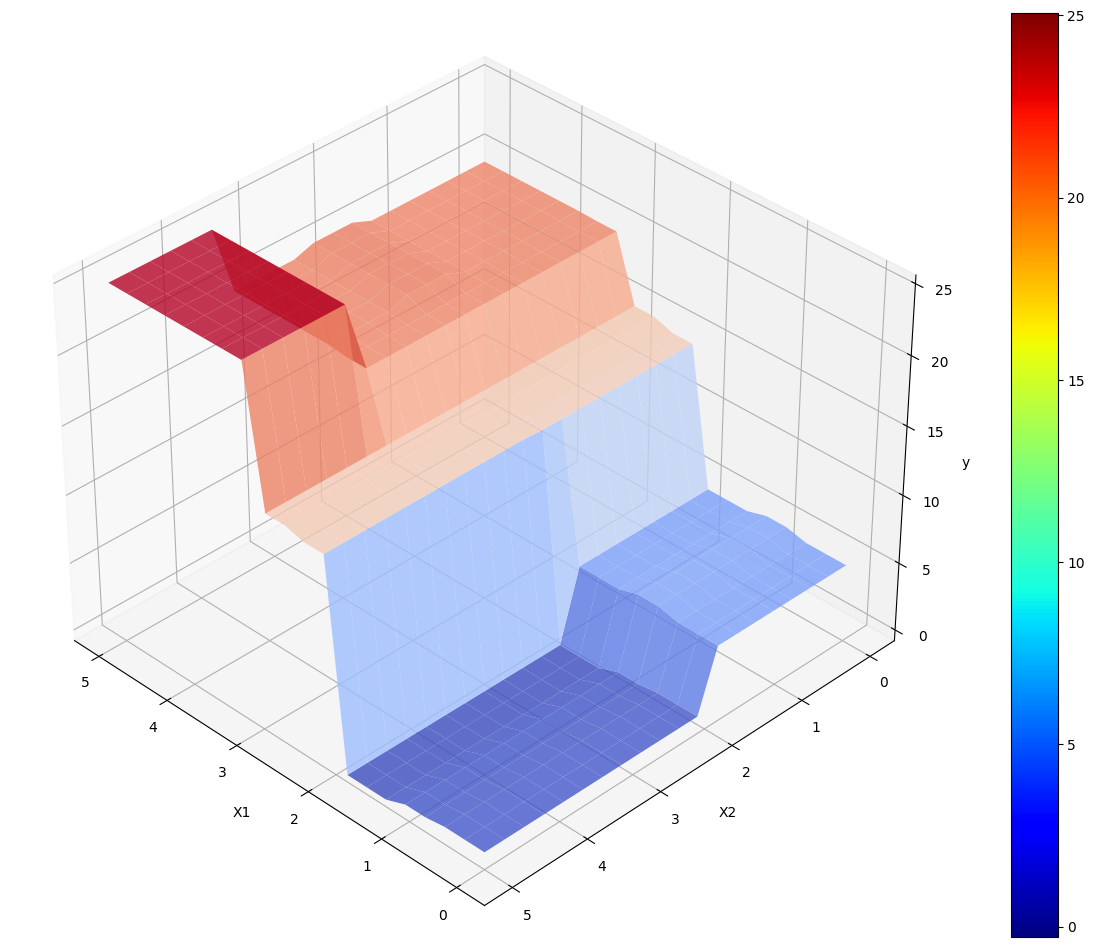

RMSE of best model:  0.820708437720903


In [19]:
print("best max_depth:",best_parameters['max_depth'], "; best min_samples_leaf: ", best_parameters['min_samples_leaf'])

features = ['X1', 'X2']
target = ['y']
y = df_nonTest[target]
X = df_nonTest[features]

# Next, refit a model on the full non-test data using the best parameters
my_tree_model = None   #placeholder for you to store the model you fit on the best parameters


#----------- STUDENT CODE HERE ----------------

# call fit_my_tree(...) with the parameters of the best models for 'max_depth' and 'min_samples_leaf' and return the fitted tree in my_tree_model
my_tree_model = fit_my_tree(X,y, best_parameters['max_depth'], best_parameters['min_samples_leaf'])

#-------------END STUDENT CODE

plt.figure(figsize = (32,18))
fig = tree.plot_tree(my_tree_model,feature_names=features,filled=True)

displayRegressionTreeMesh(regressorModel=my_tree_model, gridcount=20)

print("RMSE of best model: ", displayRMSE(regressorModel=my_tree_model, df=df_test, features = ['X1', 'X2'], target = ['y']  ))

